### AML2203 - Advanced Python AI and ML Tools - Final Project

__Group Members:__
1) Aanal Patel - C0910376
2) Aniketh Vaglapuram - C0903304
3) Bimal Shresta - C0919385
4) Danilo Diaz - C0889539
5) Ernie Sumoso - C0881591 
6) Siddharth Yadav - C0907985

### 1. EDA

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

Loading the dataset from the our scraped files

In [2]:
# read dataset from csv file
df = pd.read_csv('matches_1000.csv')

# displaying the raw data
df.tail()

,match_id,start_time,radiant_team_id,radiant_name,dire_team_id,dire_name,leagueid,league_name,series_type,radiant_win,...,team2_hero1_gamesPlayed,team2_hero1_wins,team2_hero2_gamesPlayed,team2_hero2_wins,team2_hero3_gamesPlayed,team2_hero3_wins,team2_hero4_gamesPlayed,team2_hero4_wins,team2_hero5_gamesPlayed,team2_hero5_wins
995,7646061364,1710927713,9330485.0,BulletProofs,8893837.0,Parallel eSports,15819,Ancients League,1,True,...,48.0,25.0,67.0,42.0,29.0,17.0,53.0,22.0,107.0,71.0
996,7646029532,1710925568,8629318.0,Mad Monkeys,8629324.0,Swift Knights,16059,Destiny League,1,True,...,442.0,221.0,213.0,105.0,237.0,123.0,159.0,88.0,104.0,39.0
997,7646024029,1710925131,8597976.0,Talon,8254145.0,Execration,16390,DreamLeague Season 23 Qualifiers Powered by Intel,1,True,...,39.0,20.0,40.0,23.0,53.0,31.0,50.0,26.0,47.0,22.0
998,7646023923,1710925122,8668460.0,Blacklist Rivalry,9264152.0,MAG Indonesia,16390,DreamLeague Season 23 Qualifiers Powered by Intel,1,True,...,15.0,8.0,16.0,9.0,31.0,19.0,11.0,8.0,3.0,0.0
999,7646022906,1710925049,8936507.0,FenixTeam,8893840.0,Big Bang Gaming,15819,Ancients League,1,False,...,136.0,76.0,58.0,32.0,37.0,24.0,93.0,55.0,70.0,40.0


In [3]:
# show shape and column names
def display_shape_and_colnames(df):
    print("# Rows:", df.shape[0])
    print("# Columns:", df.shape[1])
    print("Column names:", df.columns)

display_shape_and_colnames(df)

# Rows: 1000
# Columns: 95
Column names: Index(['match_id', 'start_time', 'radiant_team_id', 'radiant_name',
       'dire_team_id', 'dire_name', 'leagueid', 'league_name', 'series_type',
       'radiant_win', 'region', 'team2_ban1', 'team1_ban1', 'team1_ban2',
       'team2_ban2', 'team1_ban3', 'team1_ban4', 'team2_ban3', 'team2_hero1',
       'team1_hero1', 'team2_ban4', 'team2_ban5', 'team1_ban5', 'team1_hero2',
       'team2_hero2', 'team2_hero3', 'team1_hero3', 'team1_hero4',
       'team2_hero4', 'team2_ban6', 'team1_ban6', 'team1_ban7', 'team2_ban7',
       'team2_hero5', 'team1_hero5', 'team1_id', 'team1_rating', 'team1_wins',
       'team1_losses', 'team1_last_match_time', 'team2_id', 'team2_rating',
       'team2_wins', 'team2_losses', 'team2_last_match_time',
       'team1_player1_id', 'team1_player1_gamesPlayed', 'team1_player1_wins',
       'team1_player2_id', 'team1_player2_gamesPlayed', 'team1_player2_wins',
       'team1_player3_id', 'team1_player3_gamesPlayed', 'team1_p

In [4]:
# display column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 95 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   match_id                   1000 non-null   int64  
 1   start_time                 1000 non-null   int64  
 2   radiant_team_id            985 non-null    float64
 3   radiant_name               969 non-null    object 
 4   dire_team_id               984 non-null    float64
 5   dire_name                  969 non-null    object 
 6   leagueid                   1000 non-null   int64  
 7   league_name                1000 non-null   object 
 8   series_type                1000 non-null   int64  
 9   radiant_win                1000 non-null   bool   
 10  region                     968 non-null    float64
 11  team2_ban1                 982 non-null    float64
 12  team1_ban1                 982 non-null    float64
 13  team1_ban2                 982 non-null    float6

In [5]:
# display dataset statistic description
df.describe()

,match_id,start_time,radiant_team_id,dire_team_id,leagueid,series_type,region,team2_ban1,team1_ban1,team1_ban2,...,team2_hero1_gamesPlayed,team2_hero1_wins,team2_hero2_gamesPlayed,team2_hero2_wins,team2_hero3_gamesPlayed,team2_hero3_wins,team2_hero4_gamesPlayed,team2_hero4_wins,team2_hero5_gamesPlayed,team2_hero5_wins
count,1.000000e+03,1.000000e+03,9.850000e+02,9.840000e+02,1000.000000,1000.000000,968.000000,982.000000,982.000000,982.000000,...,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,7.653690e+09,1.711338e+09,8.262297e+06,8.238466e+06,16185.148000,1.024000,6.422521,72.303462,71.229124,68.000000,...,55.660000,28.913684,51.255789,26.644211,41.923158,21.922105,41.730526,21.841053,38.104211,19.845263
std,4.316900e+06,2.319333e+05,2.198489e+06,2.274647e+06,246.919192,0.288977,6.473411,33.599026,33.463133,34.115054,...,80.967914,40.733979,79.549051,40.842804,60.985301,32.090169,60.606011,32.566039,55.140196,29.021889
min,7.646023e+09,1.710925e+09,5.000000e+00,5.000000e+00,15819.000000,0.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.649674e+09,1.711128e+09,8.629014e+06,8.629014e+06,15901.000000,1.000000,3.000000,49.000000,49.000000,43.000000,...,7.000000,4.000000,7.000000,4.000000,6.000000,3.000000,5.000000,3.000000,4.000000,2.000000
50%,7.654169e+09,1.711356e+09,8.894818e+06,8.957156e+06,16249.500000,1.000000,3.000000,72.500000,66.000000,66.000000,...,24.000000,12.000000,20.000000,11.000000,18.000000,9.000000,17.000000,8.000000,15.000000,7.000000
75%,7.657224e+09,1.711533e+09,9.330492e+06,9.330485e+06,16390.000000,1.000000,8.000000,98.000000,98.000000,98.000000,...,75.000000,39.000000,63.000000,33.000000,53.000000,28.000000,50.000000,25.750000,51.750000,27.000000
max,7.661062e+09,1.711737e+09,9.389538e+06,9.389538e+06,16527.000000,2.000000,38.000000,137.000000,138.000000,137.000000,...,461.000000,226.000000,548.000000,266.000000,548.000000,266.000000,548.000000,266.000000,548.000000,266.000000


Changing the data type of datetime columns:
- start time
- team 1 last match time
- team 2 last match time

In [6]:
# set the datetime columns into datetime
def convert_columns_to_datatime(columns):
    for column in columns:
        df[column] = pd.to_datetime(df[column], unit='s')

date_columns = ['start_time', 'team1_last_match_time', 'team2_last_match_time']
convert_columns_to_datatime(date_columns)
df[date_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   start_time             1000 non-null   datetime64[ns]
 1   team1_last_match_time  959 non-null    datetime64[ns]
 2   team2_last_match_time  959 non-null    datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 23.6 KB


In [7]:
# identifying numerical columns
def get_numerical_columns(df):
    numeric_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    return df.select_dtypes(include=numeric_types).columns.to_list()

numeric_columns = get_numerical_columns(df)
print("# Numerical columns:", len(numeric_columns))
print("Numeric columns:", numeric_columns)

# Numerical columns: 88
Numeric columns: ['match_id', 'radiant_team_id', 'dire_team_id', 'leagueid', 'series_type', 'region', 'team2_ban1', 'team1_ban1', 'team1_ban2', 'team2_ban2', 'team1_ban3', 'team1_ban4', 'team2_ban3', 'team2_hero1', 'team1_hero1', 'team2_ban4', 'team2_ban5', 'team1_ban5', 'team1_hero2', 'team2_hero2', 'team2_hero3', 'team1_hero3', 'team1_hero4', 'team2_hero4', 'team2_ban6', 'team1_ban6', 'team1_ban7', 'team2_ban7', 'team2_hero5', 'team1_hero5', 'team1_id', 'team1_rating', 'team1_wins', 'team1_losses', 'team2_id', 'team2_rating', 'team2_wins', 'team2_losses', 'team1_player1_id', 'team1_player1_gamesPlayed', 'team1_player1_wins', 'team1_player2_id', 'team1_player2_gamesPlayed', 'team1_player2_wins', 'team1_player3_id', 'team1_player3_gamesPlayed', 'team1_player3_wins', 'team1_player4_id', 'team1_player4_gamesPlayed', 'team1_player4_wins', 'team1_player5_id', 'team1_player5_gamesPlayed', 'team1_player5_wins', 'team2_player1_id', 'team2_player1_gamesPlayed', 'team2_p

In [8]:
# identifying non-numerical columns
def get_non_numerical_columns(df):
    numeric_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    return df.select_dtypes(exclude=numeric_types).columns.to_list()

non_numeric_columns = get_non_numerical_columns(df)
print("# Non-numerical columns:", len(non_numeric_columns))
print("Non-numeric columns:", non_numeric_columns)

# Non-numerical columns: 7
Non-numeric columns: ['start_time', 'radiant_name', 'dire_name', 'league_name', 'radiant_win', 'team1_last_match_time', 'team2_last_match_time']


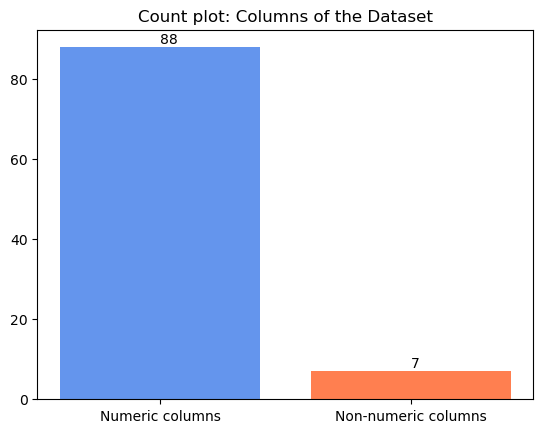

In [9]:
# plot numeric vs non-numeric columns count
def plot_column_counts(df):
    # get column names
    numeric_columns = get_numerical_columns(df)
    non_numeric_columns = get_non_numerical_columns(df)
    
    # plot the bar chart
    data = [('Numeric columns', len(numeric_columns)), ('Non-numeric columns', len(non_numeric_columns))]
    plt.bar(x=[x[0] for x in data ], height=[y[1] for y in data], color=['cornflowerblue', 'coral'])
    plt.title("Count plot: Columns of the Dataset")
    
    # annotate values into the plot
    max_y = max([y[1] for y in data])
    for i, (x, y) in enumerate(data):
        plt.annotate(str(y), (i, y + 0.01 * max_y))
    plt.show()

plot_column_counts(df)

In [10]:
# checking number & percentage of missing values per column
def check_overall_missing_values(df):
    mean = np.mean(df.isna().sum())
    median = np.median(df.isna().sum())
    print(f"Average of Missing Values per column: {mean:.2f}")
    print(f"Median of Missing Values per column: {median:.0f}")
    print(f"% Average of Missing Values: {mean*100/df.shape[0]:.2f} %")
    print(f"% Median of Missing Values: {median*100/df.shape[0]:.2f} %")
    
check_overall_missing_values(df)

Average of Missing Values per column: 30.54
Median of Missing Values per column: 41
% Average of Missing Values: 3.05 %
% Median of Missing Values: 4.10 %


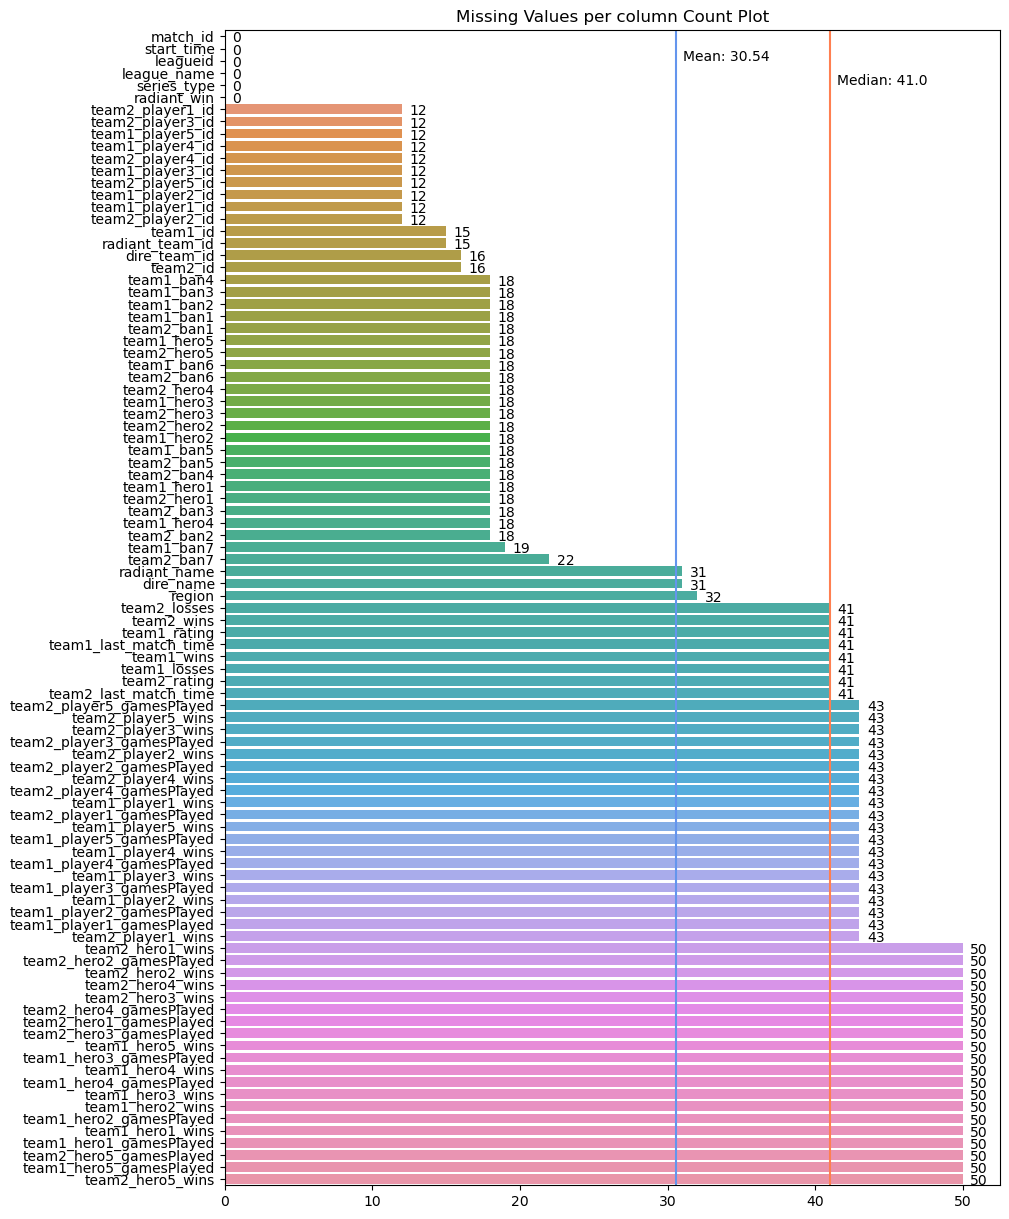

In [11]:
# plot bars of missing values (or unique values) per column, with mean and median lines
def plot_column_values(df, counting='missing_values'):
    # set the values and plot the column counts
    plt.figure(figsize=(10,15))
    if counting == "missing_values":
        values = df.isna().sum().sort_values(ascending=True)
    elif counting == "unique_values":
        values = df.nunique().sort_values(ascending=True)
    column_names = values.index
    sns.barplot(x=values, y=column_names)

    # plot mean and median lines
    mean = np.mean(values)
    median = np.median(values)
    plt.axvline(x=mean, color='cornflowerblue')
    plt.axvline(x=median, color='coral')
    plt.annotate("Mean: "+str(round(mean, 2)), (0.5 + mean, 2))
    plt.annotate("Median: "+str(median), (0.5 + median, 4))

    # annotate values into the plot
    max_x = max(values)
    for i, (missing_value, column) in enumerate(zip(values, column_names)):
        plt.annotate(str(missing_value), (missing_value + 0.01 * max_x, i + 0.5))
    plt.title(counting.replace("_"," ").title() + " per column Count Plot")
    plt.show()
    
plot_column_values(df, 'missing_values')

In [12]:
# check for number and % of duplicated rows
def check_duplicated_values(df):
    print("# Dupleicated Values:", df.duplicated().sum())
    print("% Duplicated Values:", df.duplicated().mean() * 100, "%")

check_duplicated_values(df)

# Dupleicated Values: 0
% Duplicated Values: 0.0 %


In [13]:
# check number and % of unique values per column
def check_overall_unique_values(df):
    mean = np.mean(df.nunique())
    median = np.median(df.nunique())
    print(f"Average of Unique Values per column: {mean:.2f}")
    print(f"Median of Unique Values per column: {median:.0f}")
    print(f"% Average of Unique Values per column (vs total rows): {mean*100/df.shape[0]:.2f} %")
    print(f"% Median of Unique Values per column (vs total rows): {median*100/df.shape[0]:.2f} %")
        
check_overall_unique_values(df)

Average of Unique Values per column: 162.51
Median of Unique Values per column: 126
% Average of Unique Values per column (vs total rows): 16.25 %
% Median of Unique Values per column (vs total rows): 12.60 %


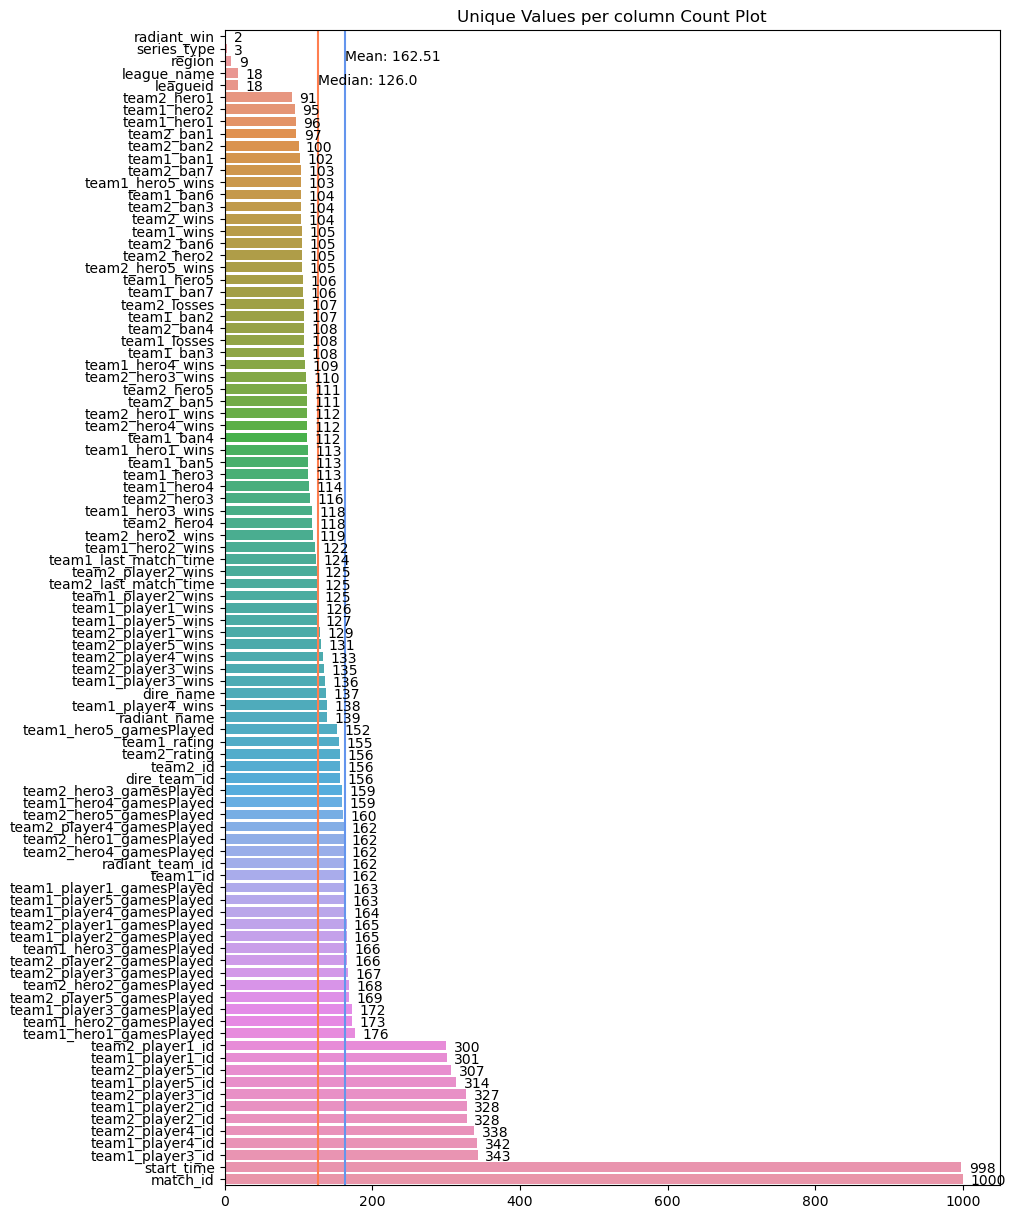

In [14]:
plot_column_values(df, 'unique_values')

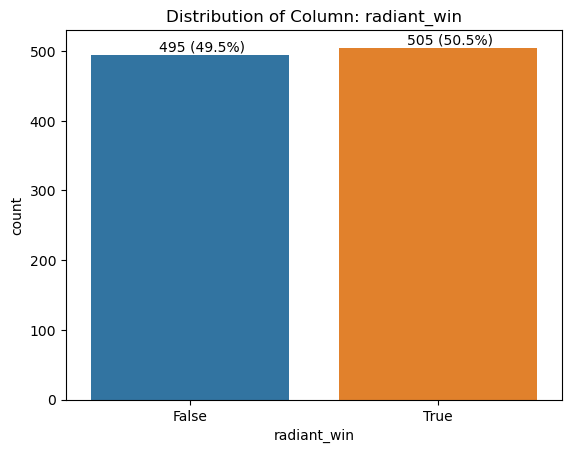

In [15]:
# check target value distribution
def plot_column_distribution_countplot(df, column):
    # plot column countplots
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of Column: {column}')
    
    # annotate counts
    for i, value in enumerate(df[column].value_counts().sort_values()):
        percentage = round(value * 100 / df.shape[0], 2)
        plt.annotate(str(value) + f" ({percentage}%)", (i - 0.125, value + 5))
    plt.show()

plot_column_distribution_countplot(df, 'radiant_win')

Our target values look totally balanced. Let's identify outliers.

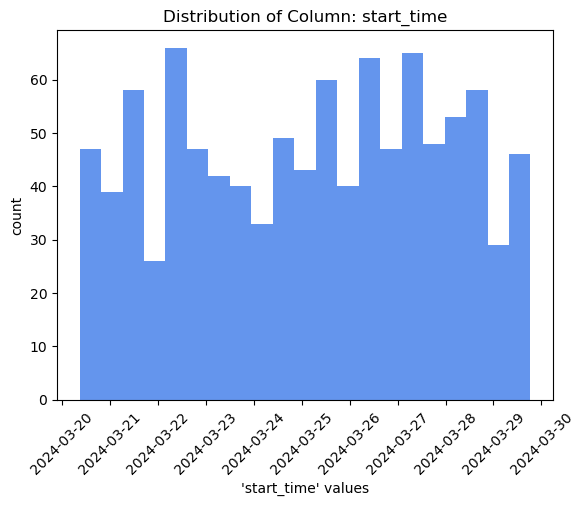

In [35]:
# check target value distribution
def plot_column_distribution_histogram(df, column, rotation=0, bins=21, color='cornflowerblue'):
    # draw plot and set labels & title
    plt.hist(df[column], bins=bins, color=color)
    plt.xticks(rotation=rotation)
    plt.xlabel("'" + column + "' values")
    plt.ylabel('count')
    plt.title(f'Distribution of Column: {column}')
    plt.show()
    
plot_column_distribution_histogram(df, 'start_time', rotation=45)

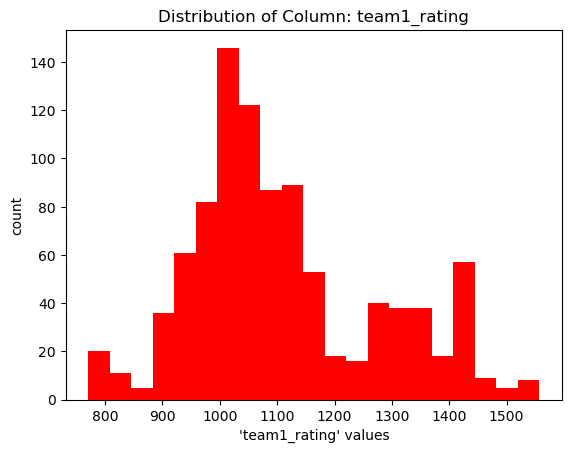

In [41]:
plot_column_distribution_histogram(df, 'team1_rating', color='r')

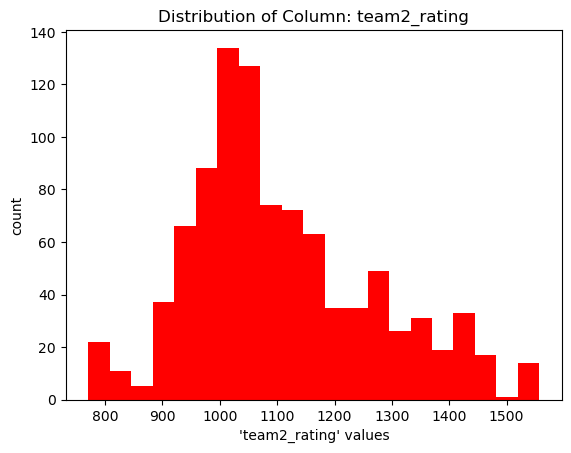

In [42]:
plot_column_distribution_histogram(df, 'team2_rating', color='r')

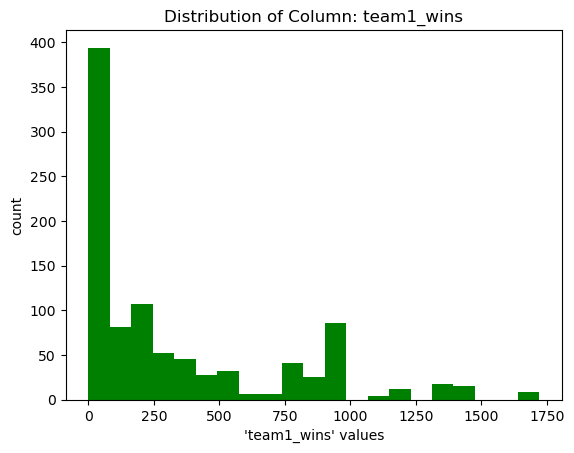

In [43]:
plot_column_distribution_histogram(df, 'team1_wins', color='g')

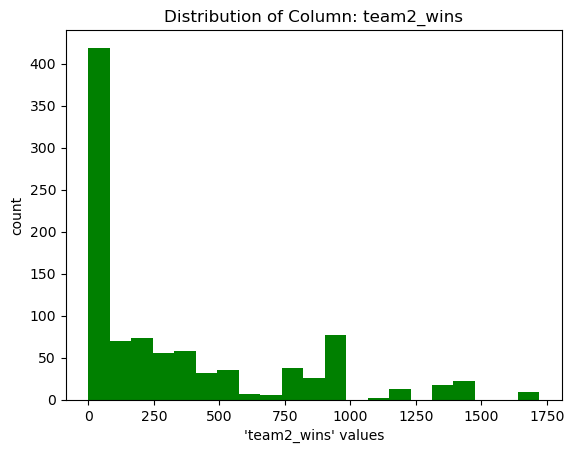

In [44]:
plot_column_distribution_histogram(df, 'team2_wins', color='g')

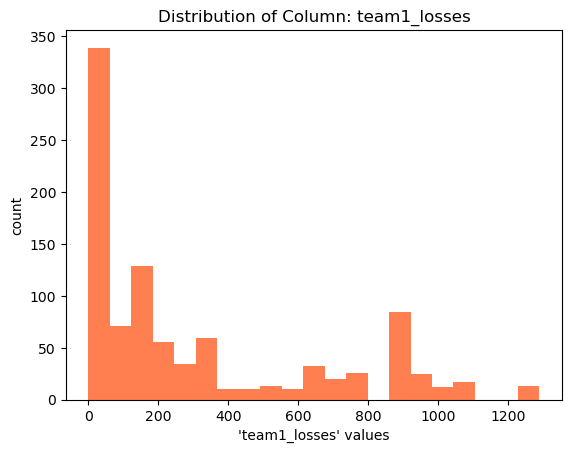

In [45]:
plot_column_distribution_histogram(df, 'team1_losses', color='coral')

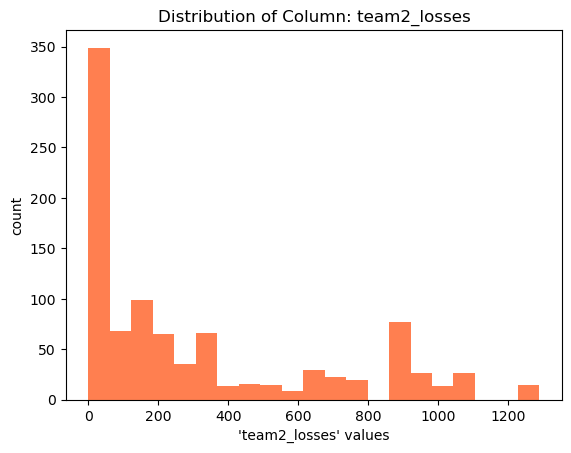

In [46]:
plot_column_distribution_histogram(df, 'team2_losses', color='coral')

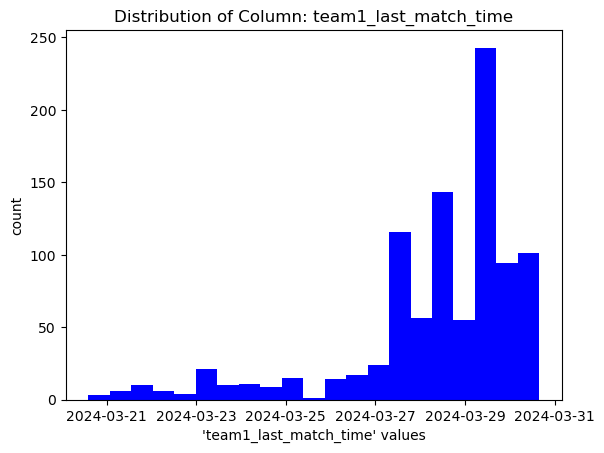

In [47]:
plot_column_distribution_histogram(df, 'team1_last_match_time', color='b')

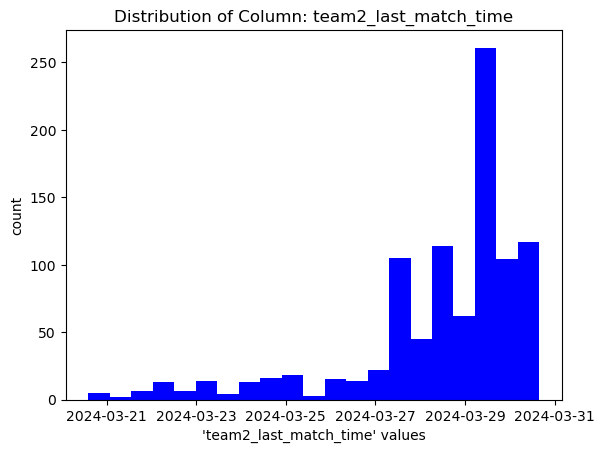

In [48]:
plot_column_distribution_histogram(df, 'team2_last_match_time', color='b')

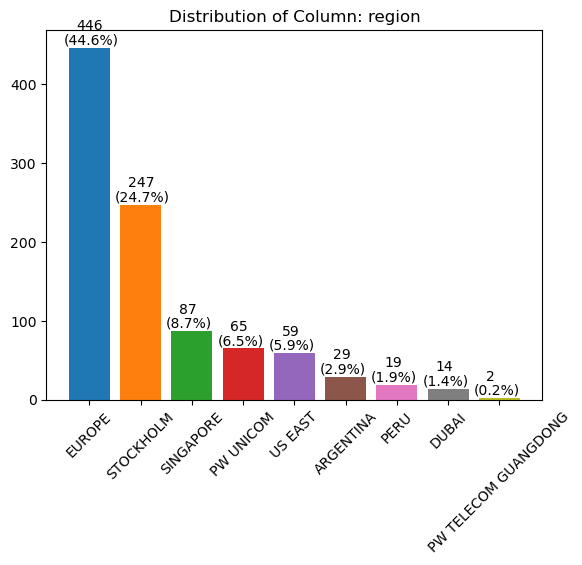

In [17]:
# check column distributions
def plot_column_distribution_bar(df, target, rotation=0, constants={}):
    # plot column countplots
    frequencies = df[target].value_counts()
    unique_values = frequencies.index
    
    # map the x-axis values if parameter constants was set
    if constants != {}:
        unique_values = [constants[str(int(value))] for value in unique_values if not math.isnan(value)]
    plt.bar(x=unique_values, height=frequencies, color=mcolors.TABLEAU_COLORS)
    plt.title(f'Distribution of Column: {target}')
    plt.xticks(rotation=rotation)
    
    # annotate frequencies and percentages
    max_y = max(frequencies)
    for i, (value, frequency) in enumerate(zip(unique_values, frequencies)):
        percentage = round(frequency * 100 / df.shape[0], 2)
        plt.annotate(str(frequency), (i - 0.25, frequency + max_y * 0.05))
        plt.annotate(f"({percentage}%)", (i - 0.5, frequency + max_y * 0.01))
    plt.show()
    
regions_constants = {"1":"US WEST","2":"US EAST","3":"EUROPE","5":"SINGAPORE","6":"DUBAI","7":"AUSTRALIA","8":"STOCKHOLM","9":"AUSTRIA","10":"BRAZIL","11":"SOUTHAFRICA","12":"PW TELECOM SHANGHAI","13":"PW UNICOM","14":"CHILE","15":"PERU","16":"INDIA","17":"PW TELECOM GUANGDONG","18":"PW TELECOM ZHEJIANG","19":"JAPAN","20":"PW TELECOM WUHAN","25":"PW UNICOM TIANJIN","37":"TAIWAN","38":"ARGENTINA"}
plot_column_distribution_bar(df, 'region', rotation=45, constants=regions_constants)

#### Dropping the Match id Because its not Required

In [ ]:
df.drop(columns=['match_id'], inplace=True)

#### Imputing the Null Values

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].mean(), inplace=True)

#### Correlation Matrix

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Dota2 Dataset')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

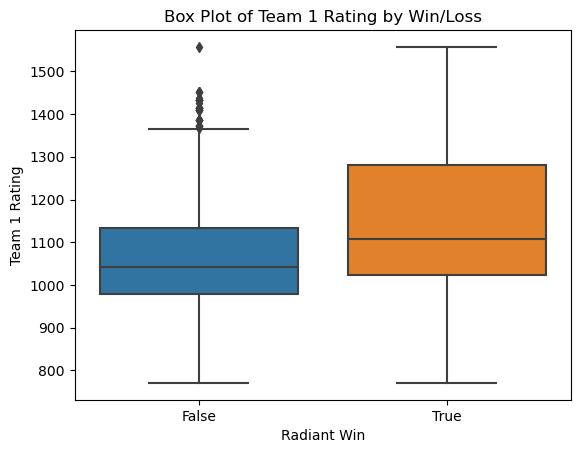

In [22]:
sns.boxplot(x='radiant_win', y='team1_rating', data=df)
plt.xlabel('Radiant Win')
plt.ylabel('Team 1 Rating')
plt.title('Box Plot of Team 1 Rating by Win/Loss')
plt.show()

In [ ]:
sns.boxplot(x='radiant_win', y='team2_rating', data=df)
plt.xlabel('Radiant Win')
plt.ylabel('Team 2 Rating')
plt.title('Box Plot of Team 2 Rating by Win/Loss')
plt.show()

In [ ]:
team_win_rates = df.groupby('radiant_win')['radiant_win'].count() / len(df) * 100

plt.figure(figsize=(6, 4))
sns.barplot(x=team_win_rates.index, y=team_win_rates.values)
plt.title('Win Rates of Radiant and Dire Teams')
plt.xlabel('Radiant Win')
plt.ylabel('Win Rate (%)')
plt.show()

In [ ]:
league_win_rates = df.groupby('league_name')['radiant_win'].mean() * 100

plt.figure(figsize=(12, 6))
sns.barplot(x=league_win_rates.index, y=league_win_rates.values)
plt.xticks(rotation=45, ha='right')
plt.title('Win Rates by Leagues')
plt.xlabel('League Name')
plt.ylabel('Win Rate (%)')
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='team1_rating', bins=20, kde=True, label='Team 1 Rating')
sns.histplot(data=df, x='team2_rating', bins=20, kde=True, label='Team 2 Rating', color='orange')
plt.title('Distribution of Team Ratings')
plt.xlabel('Team Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
region_win_rates = df.groupby('region')['radiant_win'].mean() * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=region_win_rates.index, y=region_win_rates.values)
plt.title('Win Rates by Region')
plt.xlabel('Region')
plt.ylabel('Win Rate (%)')
plt.xticks(rotation=45)
plt.show()

### Spliting the Data 

In [ ]:
X = df.drop(['radiant_win'], axis=1)
y = df['radiant_win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Peforming PCA

In [ ]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train[numerical_cols], y_train)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_resampled)

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_resampled, palette='Set1')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.legend(title='Class')
plt.show()

In [ ]:
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

model.fit(X_resampled, y_resampled)

cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='f1')

print("Cross-Validation Scores:", cv_scores)
print("Mean F1 Score:", cv_scores.mean())

In [ ]:
X_test_processed = X_test[numerical_cols]

y_pred = model.predict(X_test_processed)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))